> 问题 3: 请进行数据统计，建立不同国家旅游的网络模型，分析哪两个国家之间的旅游最为频繁？并分析这种频繁关系随时间的变化。

['Switzerland', 'Poland', 'Bahamas', 'Philippines', 'Aruba', 'Ethiopia', 'Puerto Rico', 'Morocco', 'Cyprus', 'Mexico']
Most frequent tourist connection:
Country 1: Armenia
Country 2: United States
Tourists: 24198400


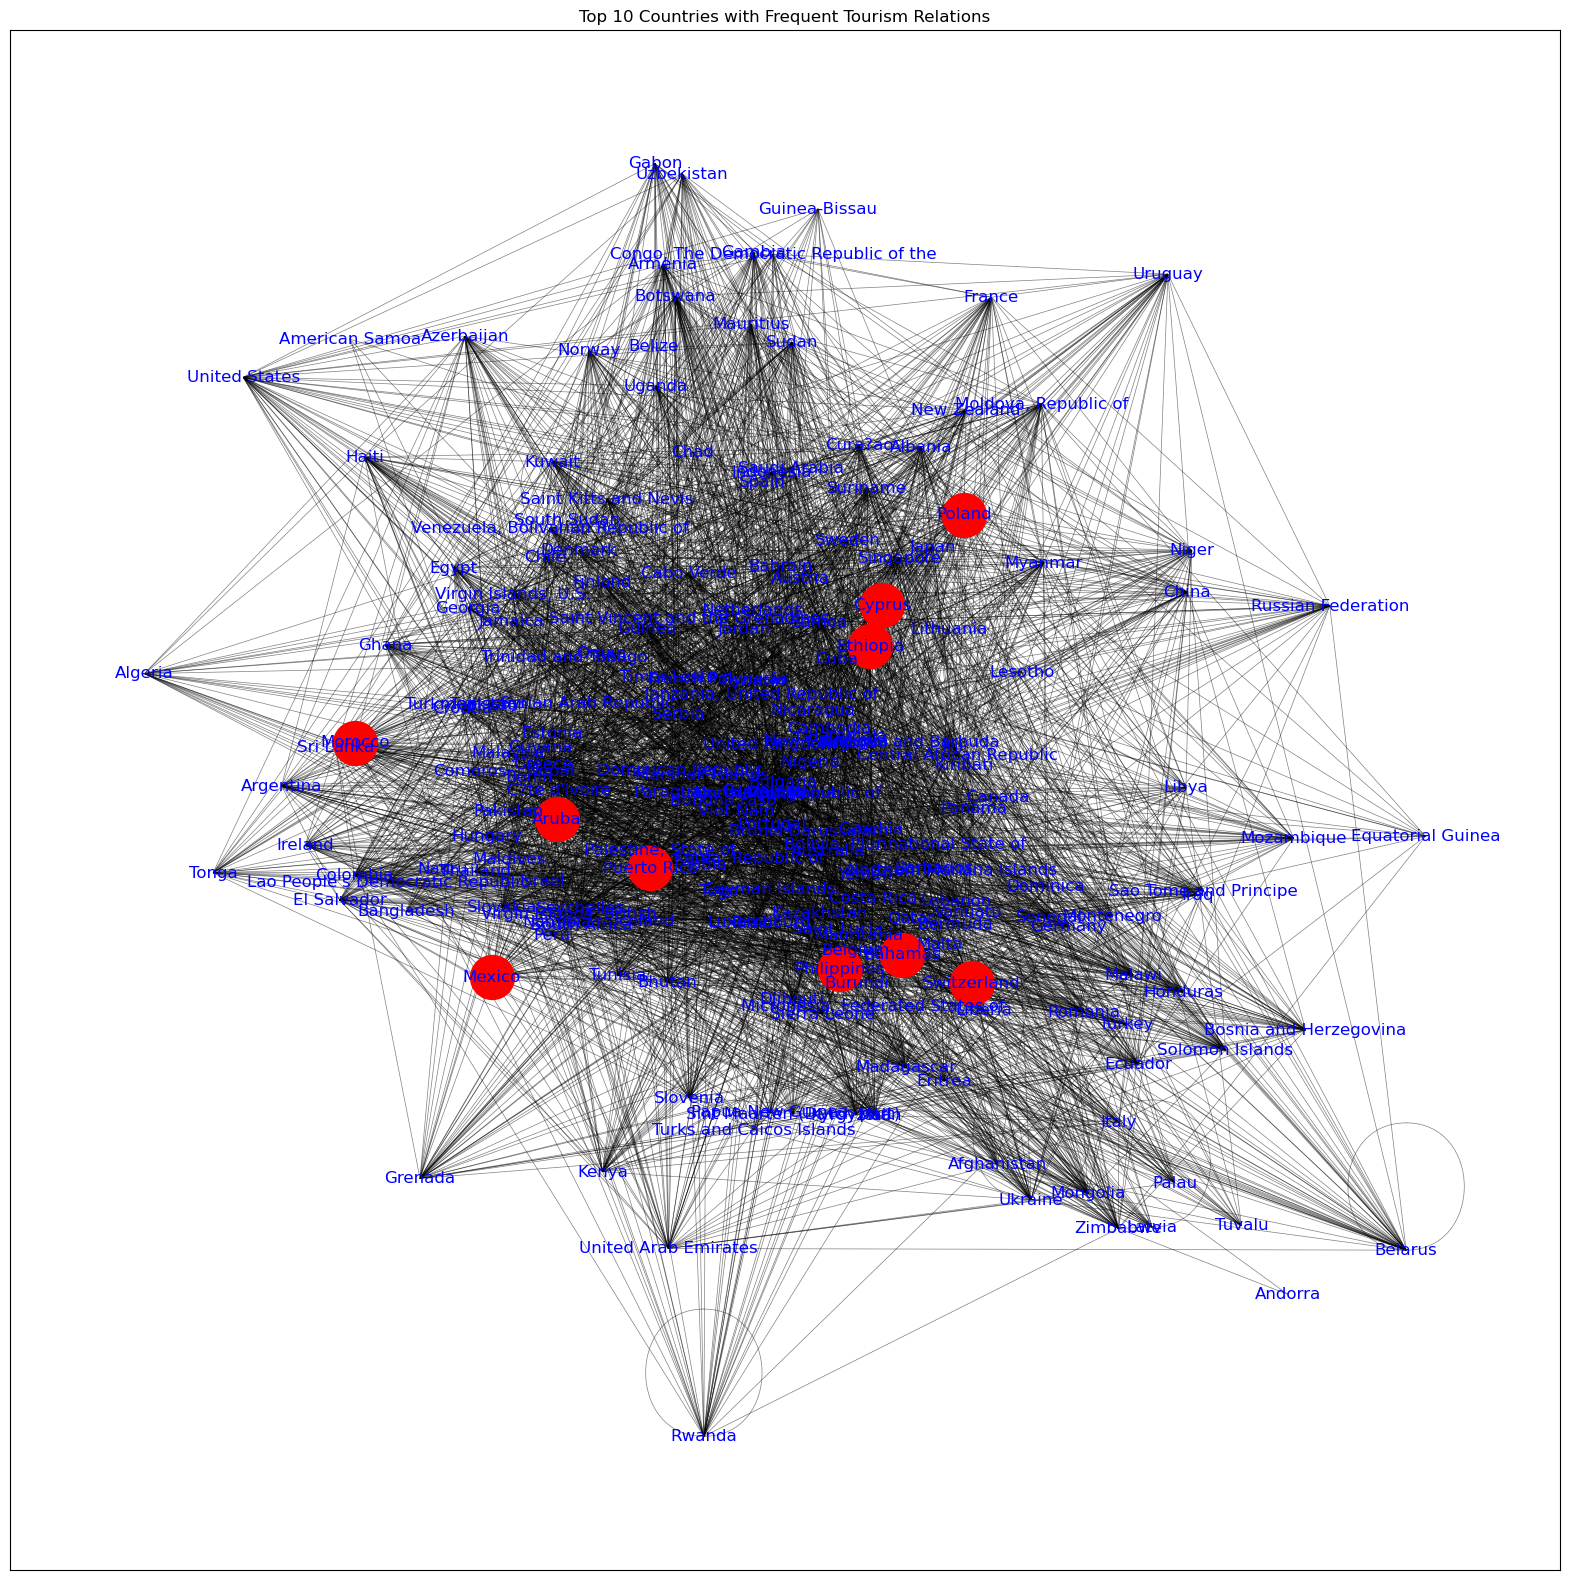

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/A.csv', encoding = 'gb2312')  # 替换为你的数据文件名

# 建立网络模型
G = nx.Graph()

for index, row in data.iterrows():
    source = row['旅游出发国家']  # 替换为源国家字段名称
    target = row['旅游到达国家']  # 替换为目标国家字段名称
    weight = row['国际旅游人数']  # 替换为旅游人数字段名称
    
    G.add_edge(source, target, weight=weight)

# 分析频繁旅游关系
degree_centrality = nx.degree_centrality(G)
sorted_countries = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
top_countries = sorted_countries[:10]  # 取前10个最频繁的国家

# 找到最频繁的连接（边）
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
# print(sorted_edges[:10])
most_frequent_edge = sorted_edges[0]  # 最频繁的连接
most_frequent_countries = (most_frequent_edge[0], most_frequent_edge[1])  # 这两个国家之间的连接

print(top_countries)
print("Most frequent tourist connection:")
print(f"Country 1: {most_frequent_countries[0]}")
print(f"Country 2: {most_frequent_countries[1]}")
print(f"Tourists: {most_frequent_edge[2]['weight']}")


# 可视化
pos = nx.spring_layout(G)  # 定义节点布局

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, nodelist=top_countries, node_size=1000, node_color='r')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12,font_color='b')

plt.title('Top 10 Countries with Frequent Tourism Relations')
plt.show()


### 分析频繁关系随时间的变化

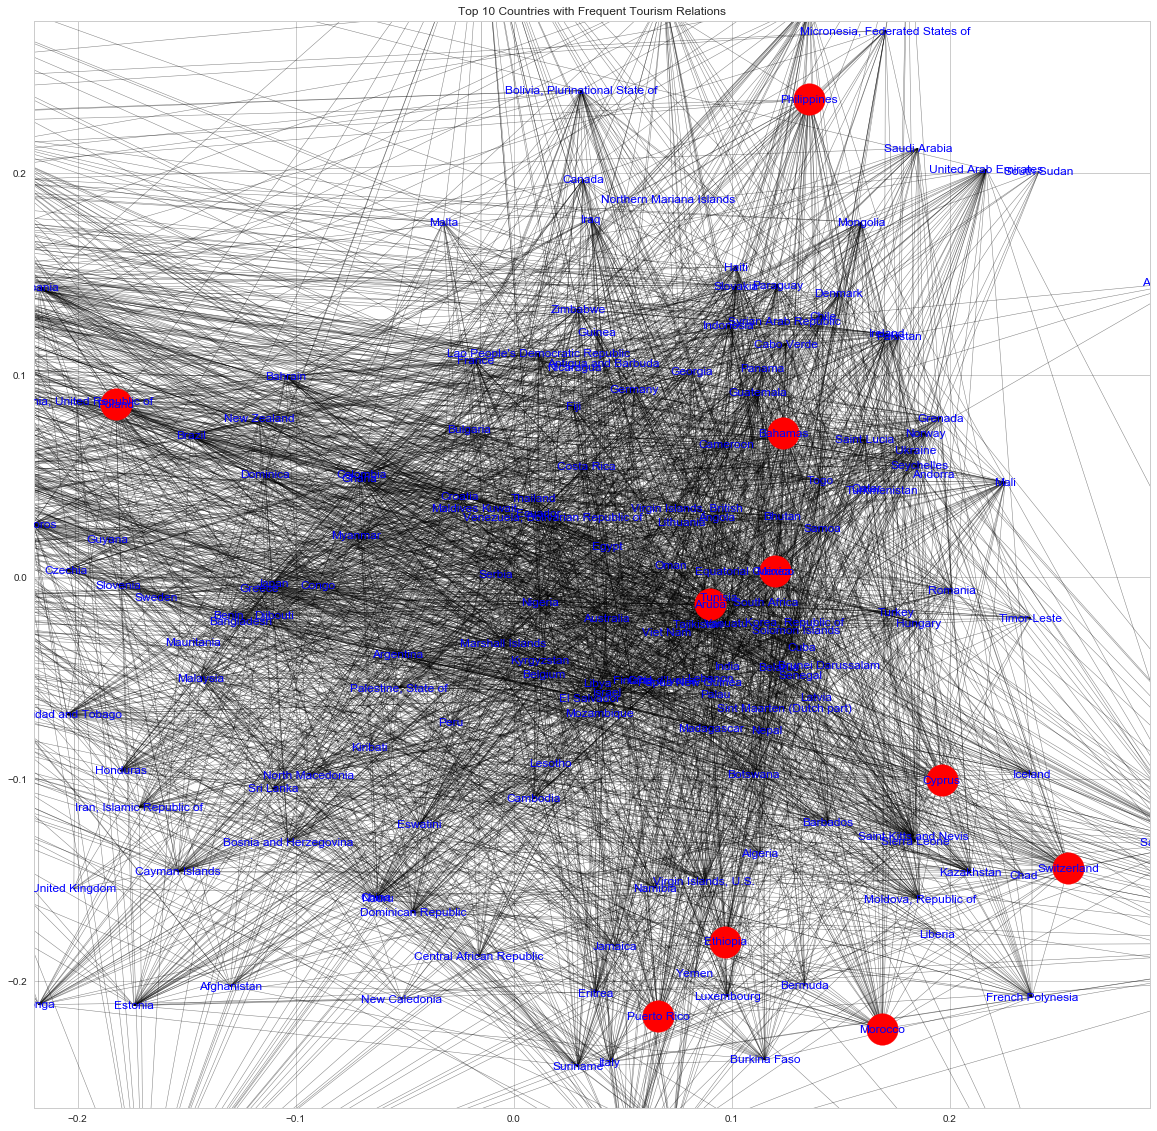

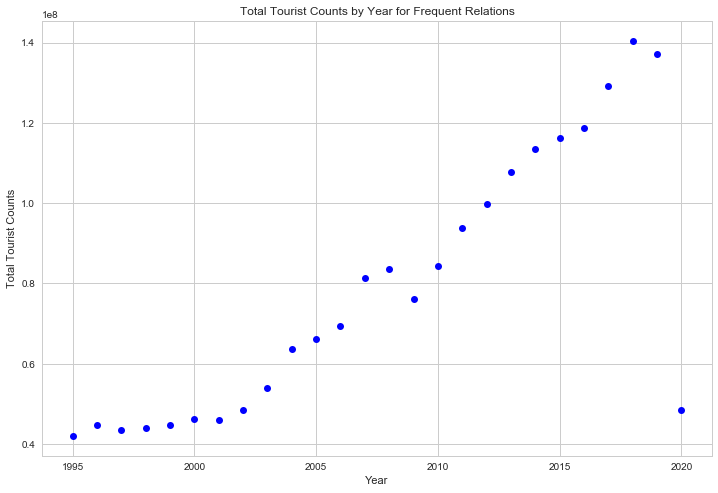

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn风格
sns.set(style="whitegrid")

# 读取数据
data = pd.read_csv('data/A.csv', encoding='gb2312')  # 替换为你的数据文件名

# 建立网络模型
G = nx.Graph()

for index, row in data.iterrows():
    source = row['旅游出发国家']  # 替换为源国家字段名称
    target = row['旅游到达国家']  # 替换为目标国家字段名称
    weight = row['国际旅游人数']  # 替换为旅游人数字段名称
    
    G.add_edge(source, target, weight=weight)

# 分析频繁旅游关系
degree_centrality = nx.degree_centrality(G)
sorted_countries = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
top_countries = sorted_countries[:10]  # 取前10个最频繁的国家

# 可视化
pos = nx.spring_layout(G)  # 定义节点布局

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, nodelist=top_countries, node_size=1000, node_color='r')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='b')

plt.title('Top 10 Countries with Frequent Tourism Relations')
plt.show()

# 分析频繁关系随时间的变化并可视化
edge_weights_by_year = {}
years = sorted(data['年份'].unique())

plt.figure(figsize=(12, 8))

for year in years:
    year_data = data[data['年份'] == year]
    year_G = nx.Graph()

    for index, row in year_data.iterrows():
        source = row['旅游出发国家']
        target = row['旅游到达国家']
        weight = row['国际旅游人数']
        year_G.add_edge(source, target, weight=weight)

    year_sorted_edges = sorted(year_G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    edge_weights_by_year[year] = [edge[2]['weight'] for edge in year_sorted_edges]

    plt.plot(year, sum(edge_weights_by_year[year]), marker='o', color='b')

plt.xlabel('Year')
plt.ylabel('Total Tourist Counts')
plt.title('Total Tourist Counts by Year for Frequent Relations')
plt.grid(True)
plt.show()


### 旅游最频繁的两个国家可视化

Most frequent tourist connection:
Country 1: Armenia
Country 2: United States
Tourists: 24198400


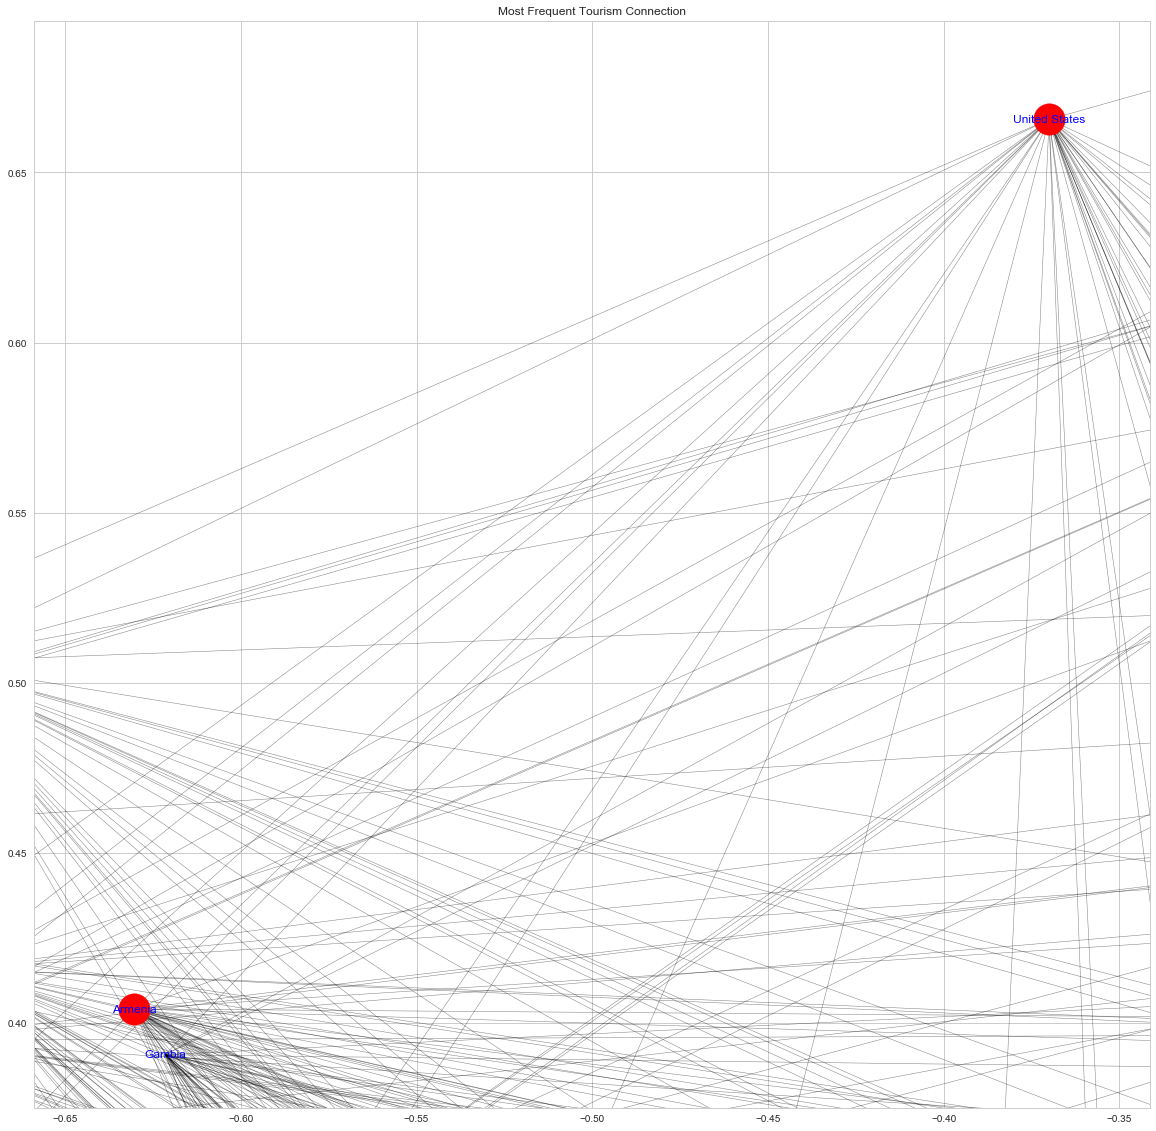

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn风格
sns.set(style="whitegrid")

# 读取数据
data = pd.read_csv('data/A.csv', encoding='gb2312')  # 替换为你的数据文件名

# 建立网络模型
G = nx.Graph()

for index, row in data.iterrows():
    source = row['旅游出发国家']  # 替换为源国家字段名称
    target = row['旅游到达国家']  # 替换为目标国家字段名称
    weight = row['国际旅游人数']  # 替换为旅游人数字段名称
    
    G.add_edge(source, target, weight=weight)

# 分析频繁旅游关系
edge_weights = nx.get_edge_attributes(G, 'weight')
most_frequent_edge = max(edge_weights, key=edge_weights.get)
most_frequent_countries = (most_frequent_edge[0], most_frequent_edge[1])
most_frequent_weight = edge_weights[most_frequent_edge]

print(f"Most frequent tourist connection:")
print(f"Country 1: {most_frequent_countries[0]}")
print(f"Country 2: {most_frequent_countries[1]}")
print(f"Tourists: {most_frequent_weight}")

# 可视化
pos = nx.spring_layout(G)  # 定义节点布局

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, nodelist=[most_frequent_countries[0], most_frequent_countries[1]], node_size=1000, node_color='r')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='b')

plt.title('Most Frequent Tourism Connection')
plt.show()


### 两个国家之间频繁关系随时间的变化的图

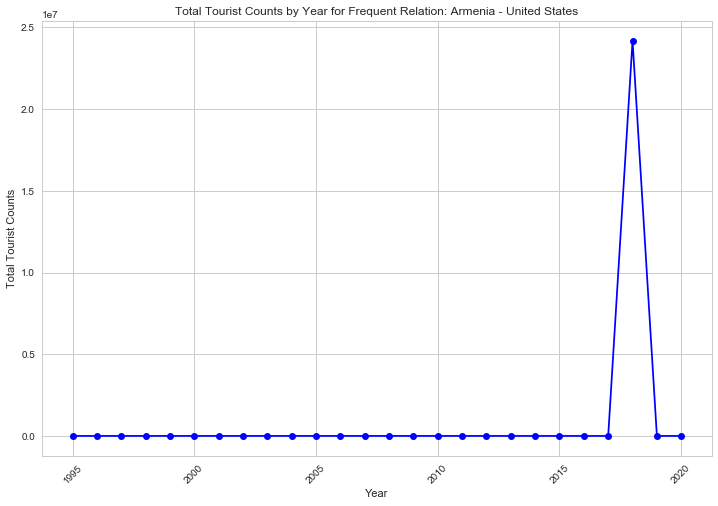

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn风格
sns.set(style="whitegrid")

# 读取数据
data = pd.read_csv('data/A.csv', encoding='gb2312')  # 替换为你的数据文件名

# 分析频繁关系随时间的变化并可视化
most_frequent_countries = ('Armenia', 'United States')  # 替换为你之前分析出的最频繁国家连接

edge_weights_by_year = {}
years = sorted(data['年份'].unique())

plt.figure(figsize=(12, 8))

for year in years:
    year_data = data[data['年份'] == year]
    year_weight = 0
    
    for index, row in year_data.iterrows():
        source = row['旅游出发国家']
        target = row['旅游到达国家']
        weight = row['国际旅游人数']
        
        if (source, target) == most_frequent_countries or (target, source) == most_frequent_countries:
            year_weight += weight

    edge_weights_by_year[year] = year_weight

plt.plot(years, [edge_weights_by_year[year] for year in years], marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total Tourist Counts')
plt.title(f'Total Tourist Counts by Year for Frequent Relation: {most_frequent_countries[0]} - {most_frequent_countries[1]}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
